In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
%env FLOWERS_MAT=conveniences/flowers.mat

env: FLOWERS_MAT=conveniences/flowers.mat


In [7]:
import random

import numpy as np
import matplotlib.pylab as plt

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

import ipyplot
from conveniences.img_vec import open_img, vec_img
from conveniences.flowers import map_flower_type
from src.attention_search import attention_search

# Examples

**Category Flower Dataset (Nilsback, Zisserman) - AlexNet Vectors**

In [8]:
# http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html
search_index = np.load("data/flowers_alexnet_full.npy")
paths = np.load("data/flowers_paths_full.npy").tolist()

print(search_index.shape, len(paths))

(8189, 4096) 8189


**Choosing a random image from the dataset to query against**

In [83]:
qidx = random.randrange(0, search_index.shape[0])
q: np.ndarray = search_index[qidx].reshape(1,-1)

paths[qidx]

'data/flowers/image_03287.jpg'

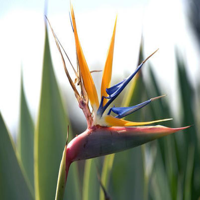

In [84]:
img = open_img(paths[qidx])
display(img)

**Perform the search**

In [85]:
found_paths, indices = attention_search(q, search_index, paths, n_results=10, full_attention=False, verbose=True)

Searched 8189 records in 0.0103 seconds


**The resulting indices were:**

In [86]:
print(indices, qidx)

[4638 2819 7401 3306 4876 5623 5352 2328 5846  232] 4638


In [87]:
flower_classes = [map_flower_type(p) for p in found_paths]
ipyplot.plot_images(found_paths, flower_classes, img_width=150)

**Search using an image not in the original dataset**

(4096,)


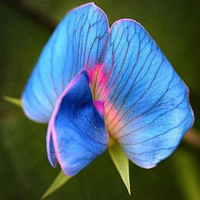

In [20]:
unseen_img = open_img("data/unseen/rare_lathyrus.jpeg", size=(200,200))
unseen_vec = vec_img(unseen_img)
uq = unseen_vec.reshape(1,-1)

display(unseen_img)

In [21]:
u_found_paths, u_indices = attention_search(uq, search_index, paths, n_results=10, full_attention=False, verbose=True)
u_indices

Searched 8189 records in 0.0084 seconds


array([6170,  204, 6763,  563, 7751, 6178, 1975, 7822, 8167, 4941])

In [22]:
flower_classes = [map_flower_type(p) for p in u_found_paths]
ipyplot.plot_images(u_found_paths, flower_classes, img_width=150)

**[Experimental] Searching Larger Dimensions**

In [53]:
svhn_vecs: np.ndarray = np.load("data/svhn.npy")
svhn_labels: list = np.load("data/svhn_labels.npy").tolist()

svhn_qidx = random.randrange(0, svhn_vecs.shape[0], 100)
svhn_q: np.ndarray = svhn_vecs[svhn_qidx]
svhn_si: np.ndarray = svhn_vecs

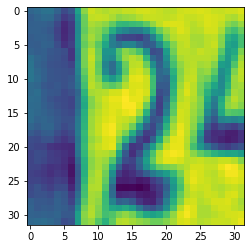

In [54]:
plt.imshow(svhn_vecs[svhn_qidx][0,::])

Searched 54701 records in 1.5614 seconds


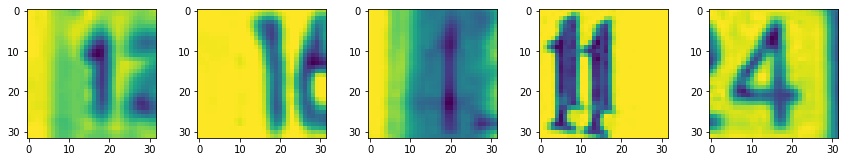

In [55]:
svhn_values, svhn_indices = attention_search(
    svhn_q, svhn_si[: svhn_qidx + 1], svhn_labels, n_results=5, full_attention=False, verbose=True
)

fig, axes = plt.subplots(1,len(svhn_indices), figsize = (12,4))
fig.tight_layout()

# print(svhn_result)
for i, item in enumerate(zip(svhn_values, svhn_indices)):
    label, idx = item
    axes[i].imshow(svhn_vecs[idx][0,::])